# Introduction

# Project Overview

# Initial Analysis

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import make_scorer, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, auc
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

plt.style.use('ggplot')

In [2]:
df_train = pd.read_csv('churn-bigml-80.csv')
df_test = pd.read_csv('churn-bigml-20.csv')


In [3]:
print(df_train.shape)
print(df_test.shape)


(2666, 20)
(667, 20)


In [4]:
df_train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df_train.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [37]:
df_train.dtypes

state                       int32
account_length              int64
area_code                   int64
international_plan          int32
voice_mail_plan             int32
number_vmail_messages       int64
total_day_minutes         float64
total_day_calls             int64
total_day_charge          float64
total_eve_minutes         float64
total_eve_calls             int64
total_eve_charge          float64
total_night_minutes       float64
total_night_calls           int64
total_night_charge        float64
total_intl_minutes        float64
total_intl_calls            int64
total_intl_charge         float64
customer_service_calls      int64
churn                        bool
dtype: object

## Initial Observations of Numeric Columns:

- Account length: Average account length is about 101 days, with a standard deviation of approximately 39.6 days. The range is wide, from 1 to 243 days.
- Area code: The area codes are limited to three values (408, 415, and 510), indicating categorical nature despite being numeric.
- Number vmail messages: On average, customers have about 8 voicemail messages, but the standard deviation is quite high (13.6), indicating a wide distribution. The maximum number of voicemail messages recorded is 50.
- Total Day, Evening, Night, and International Minutes and Calls: 
    - Total minutes and Total calls (Day, Evening, Night, and International): These columns show the total minutes and number of calls made during different times of the day. The average, standard deviation, minimum, 
    and maximum values vary for each period, which can provide insights into customer usage patterns.
    - Total Charges (Day, Evening, Night, and International): Corresponding to the minutes and calls, these columns indicate the charges incurred. They show a similar distribution pattern to the minutes columns.
- Customer Service Calls: Customers make an average of 1.56 service calls, with a standard deviation of 1.31. The maximum number of customer service calls made by a customer is 9.


In [6]:
df_train.describe(include=['O'])

,State,International plan,Voice mail plan
count,2666,2666,2666
unique,51,2,2
top,WV,No,No
freq,88,2396,1933


## Inital Observations of Categorical Columns

- State: The dataset includes customers from various states, with the number of customers from each state varying. The highest representation is from the state of WV (West Virginia) with 88 customers, and the lowest from CA (California) with 24 customers.
- International Plan: A majority of the customers do not have an international plan (2396 out of 2666), while 270 customers do.
- Voice Mail Plan: 1933 customers do not have a voice mail plan, whereas 733 customers do.

### Update Column names

In [7]:
# Change all column names to lowercase and add '_' between words
df_train.columns = [col.lower().replace(' ', '_') for col in df_train.columns]
df_test.columns = [col.lower().replace(' ', '_') for col in df_test.columns]


In [8]:
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Missing and Duplicate Values

In [10]:
# Check for missing data
df_train.isna().sum()


state                     0
account_length            0
area_code                 0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

No missing values in dataset.

In [38]:
# Check for duplicates
df_train.duplicated().sum()

0

There are no duplicate values.

# Exploratory Analysis


## Univariate Analysis

### Distribution of Target Variable

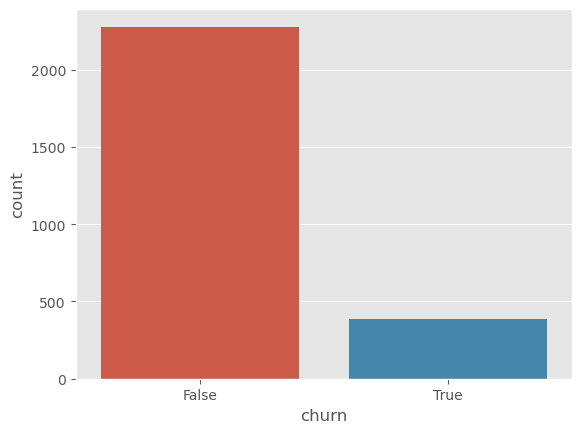

In [11]:
# show distribution of target variable

sns.countplot(data=df_train, x='churn')
plt.show()


In [12]:
# Analysis of the target variable 'churn'
churn_distribution = df_train['churn'].value_counts(normalize=True)

churn_distribution

churn
False    0.854464
True     0.145536
Name: proportion, dtype: float64

Churned customers represent only 14.55% of the data.  Such an inbalance in the target variable can create problems in model training and evaluation.


### Numeric Columns

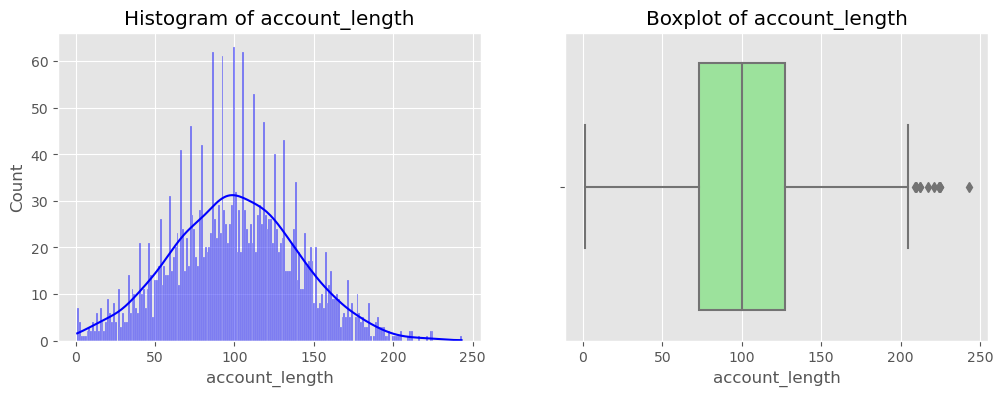

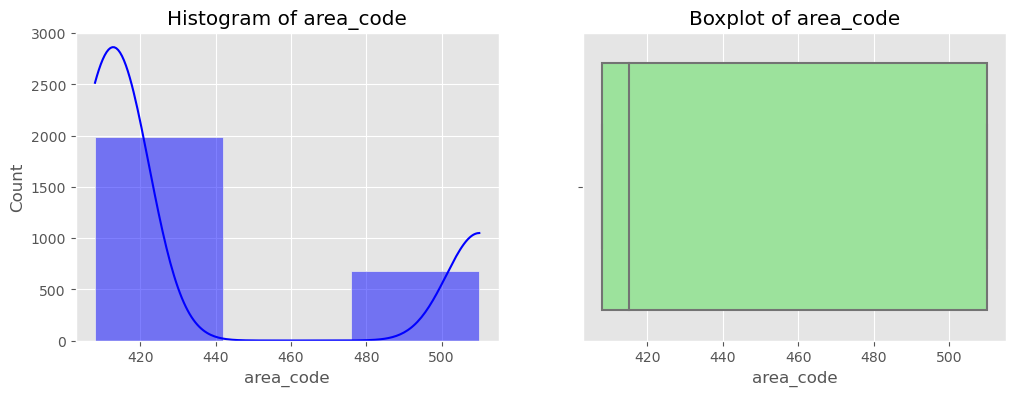

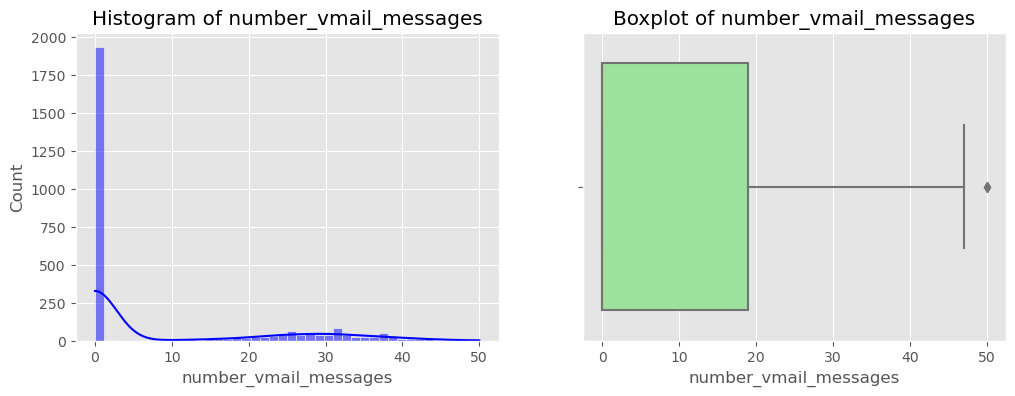

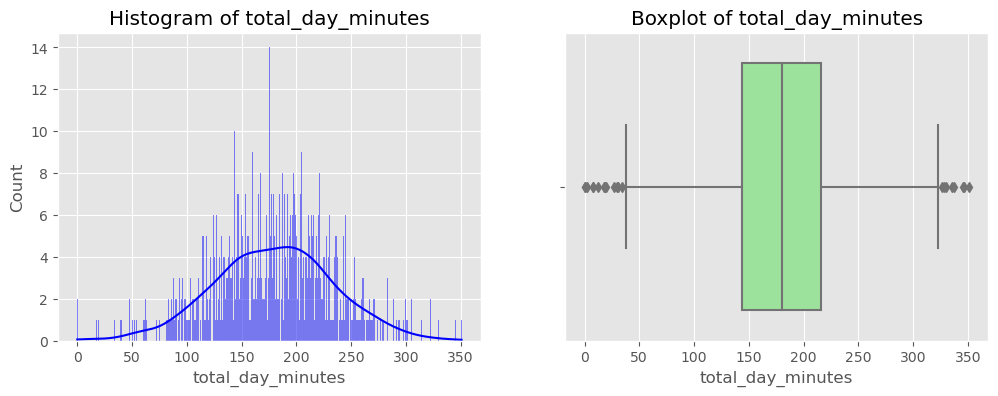

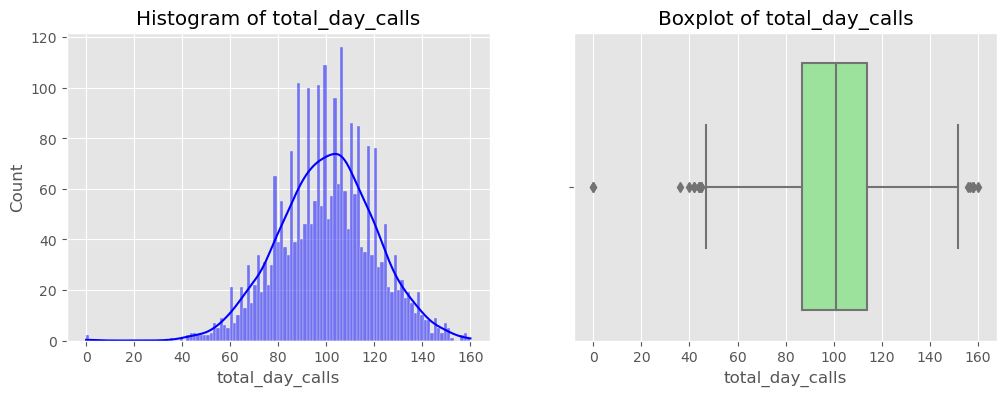

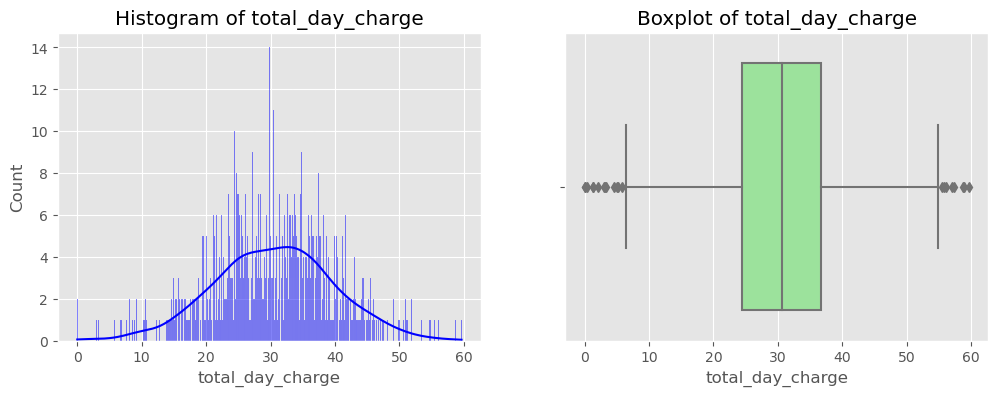

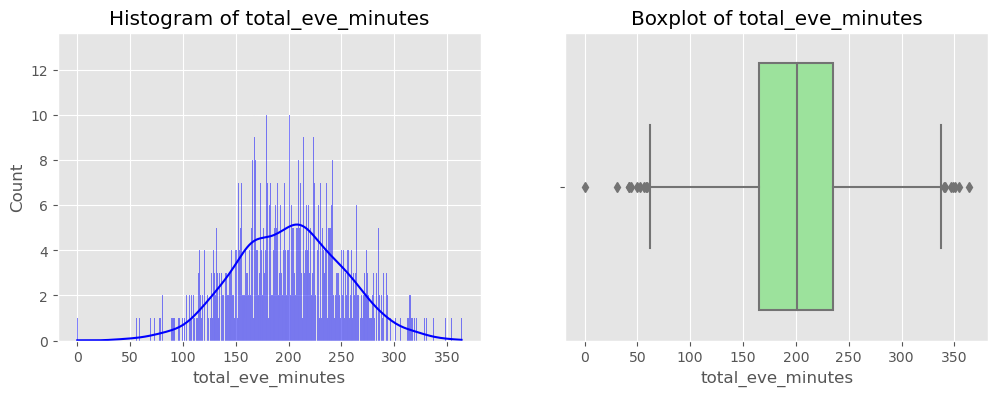

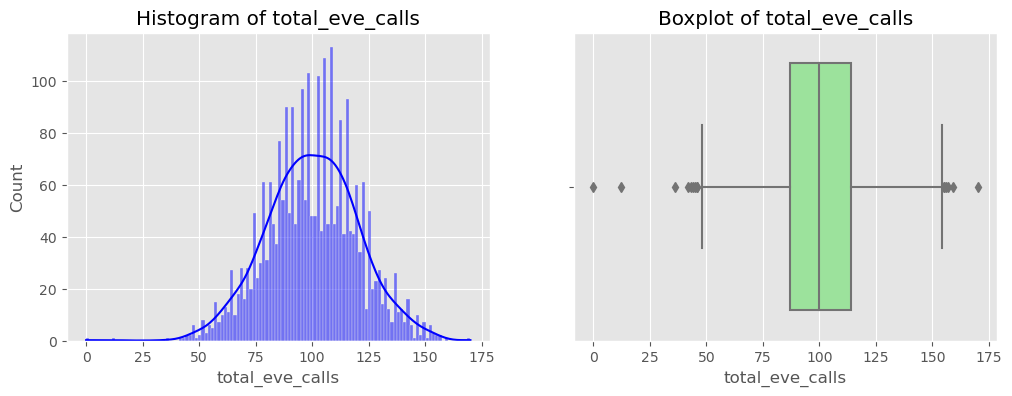

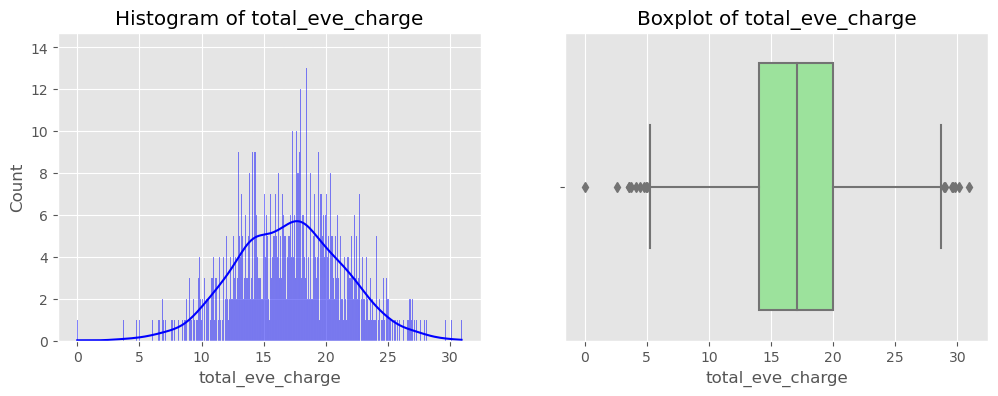

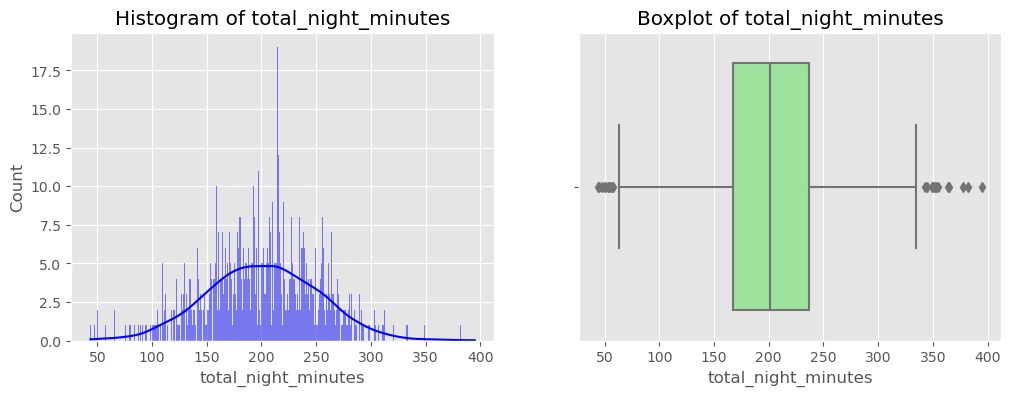

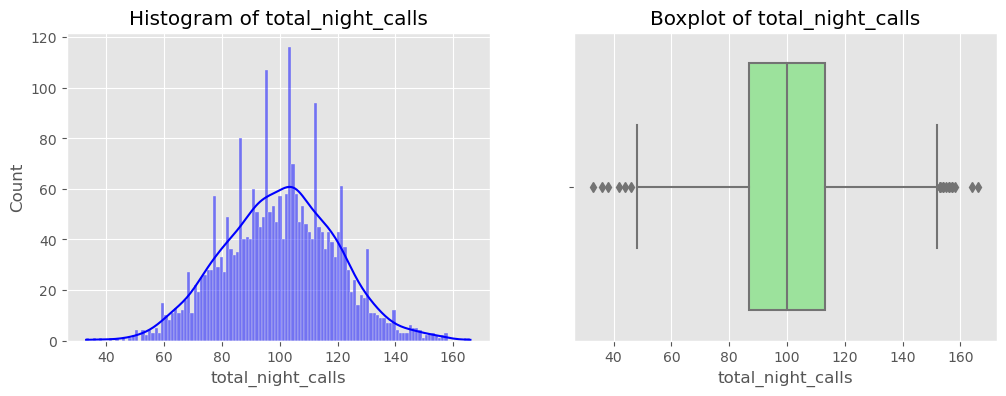

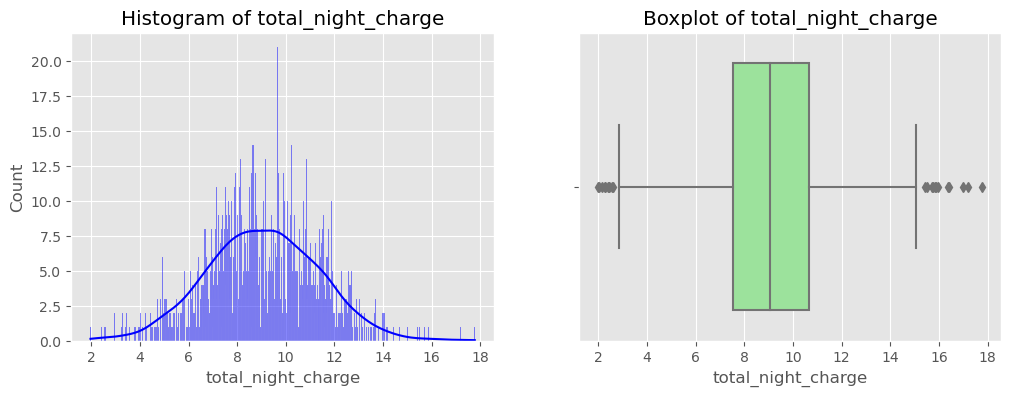

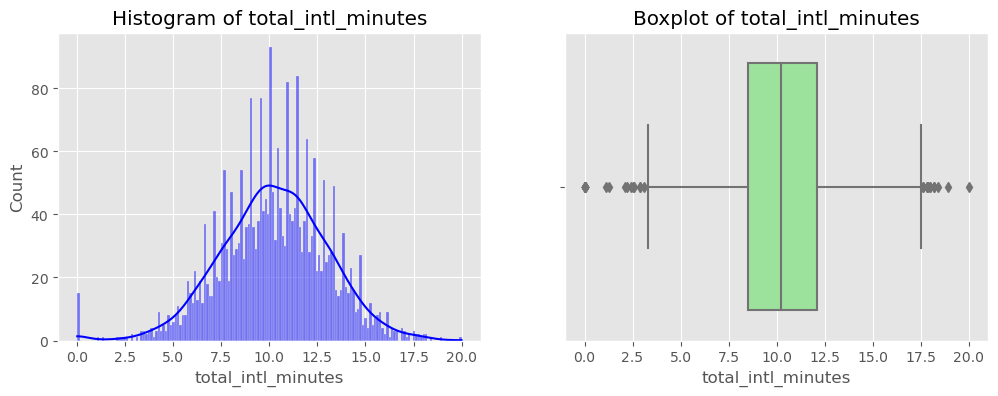

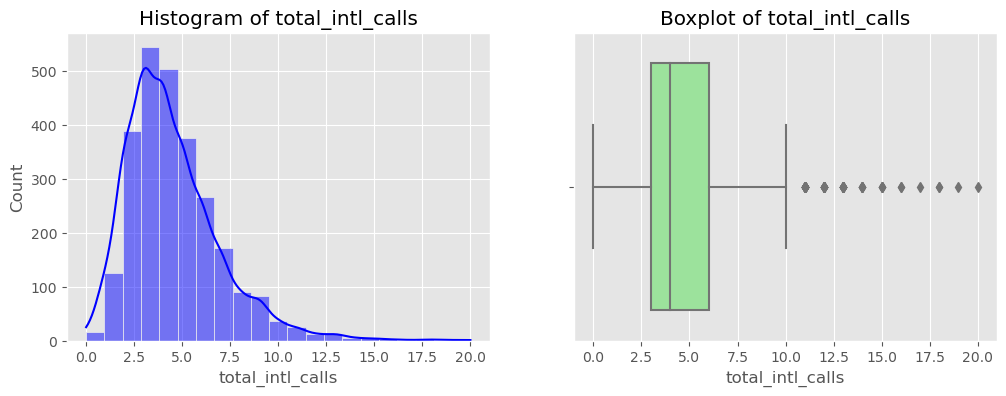

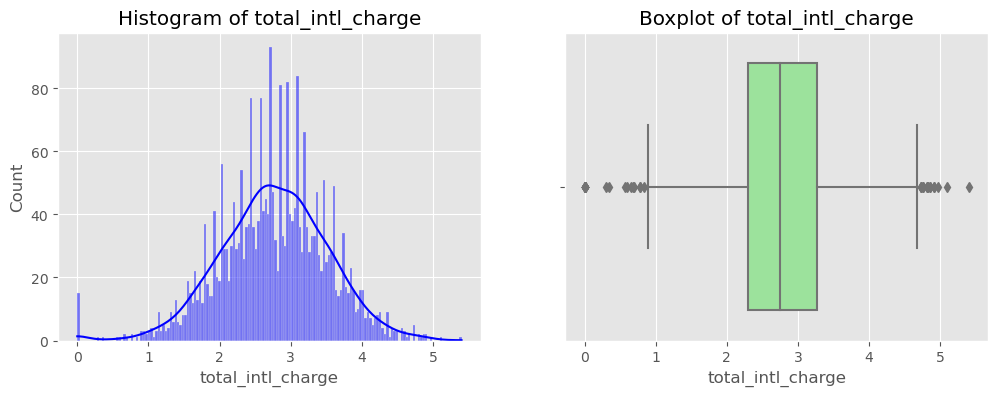

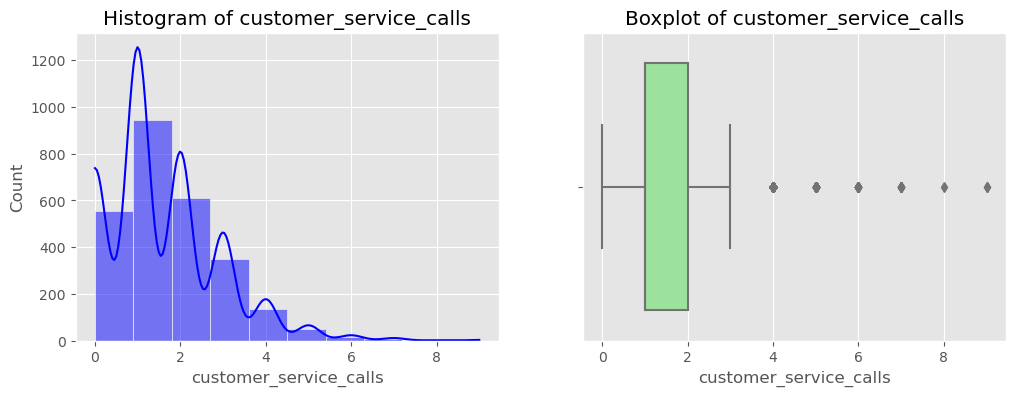

In [13]:
def show_univariate_plots(dataframe):
    ''' to print histograms and boxplots for numeric variables side-by-side '''
    num_cols = dataframe.select_dtypes(include=['int', 'float']).columns

    for col in num_cols:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))

        # Histogram
        sns.histplot(dataframe, x=col, bins=dataframe[col].nunique(), ax=axes[0], kde=True, color='blue')
        axes[0].set_title(f'Histogram of {col}')

        # Boxplot
        sns.boxplot(data=dataframe, x=col, ax=axes[1], color='lightgreen')
        axes[1].set_title(f'Boxplot of {col}')

        plt.show()
        
show_univariate_plots(df_train)

Here are some initial observations:

- Account Length: The distribution seems roughly normal, centered around 100 days. There are no significant outliers.
- Number of Voice Mail Messages: Many customers have zero voice mail messages, and the distribution is right-skewed. There are a few outliers with a very high number of messages.
- Total Day Minutes: The distribution appears normal. There are a few outliers on both the lower and upper ends.
- Total Day Calls: This variable also shows a roughly normal distribution with a few outliers.
- Total Eve Minutes, Total Night Minutes: Both show normal distributions similar to 'Total Day Minutes', with some outliers.
- Total Intl Minutes: The distribution is roughly normal, with some outliers on the higher end.
- Customer Service Calls: Most customers made only a few calls to customer service, with the distribution being right-skewed. There are outliers with a high number of customer service calls.

### Categorical Columns

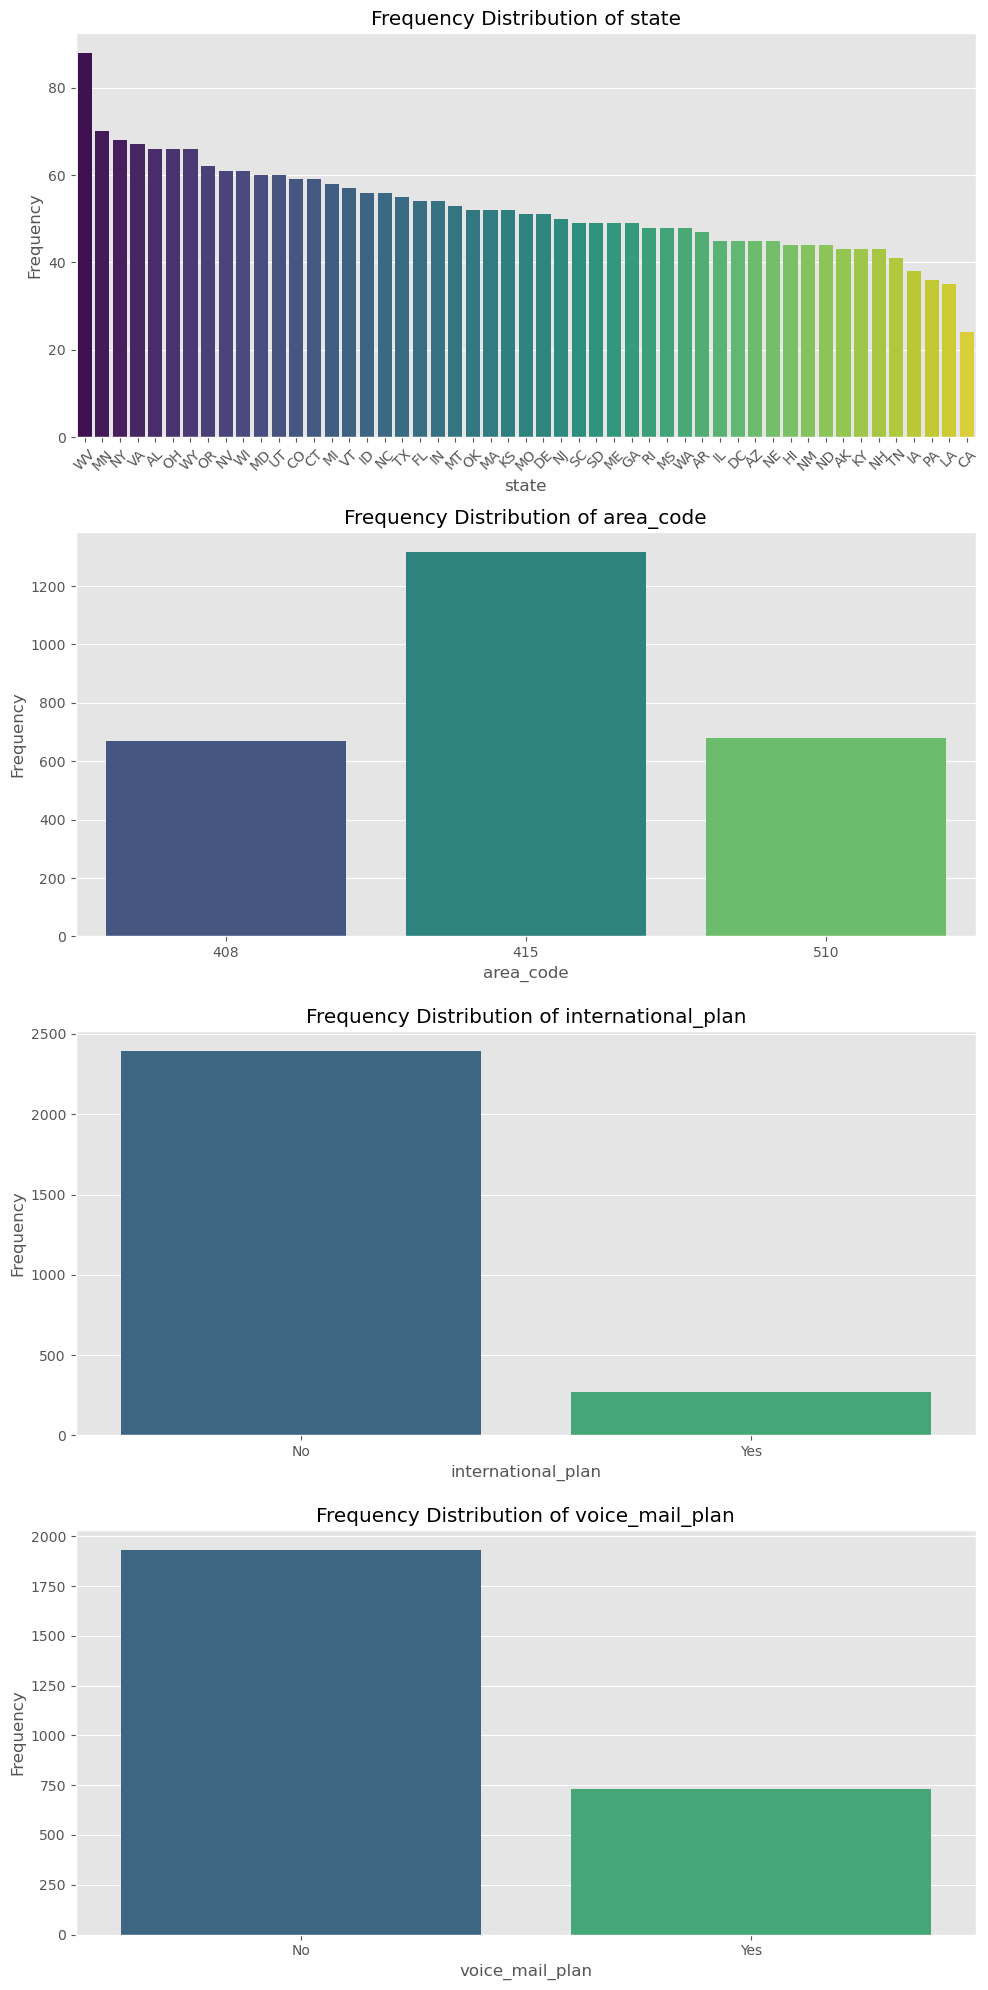

In [14]:
# Adjusting the dataset and column names for the univariate analysis of categorical variables
cat_vars_updated = ['state', 'area_code', 'international_plan', 'voice_mail_plan']

# Creating subplots for the categorical variables
fig, axes = plt.subplots(nrows=len(cat_vars_updated), ncols=1, figsize=(10, 20), tight_layout=True)

# Plotting bar plots for each categorical variable
for i, var in enumerate(cat_vars_updated):
    data_count = df_train[var].value_counts()
    sns.barplot(x=data_count.index, y=data_count.values, ax=axes[i], palette="viridis")
    axes[i].set_title(f'Frequency Distribution of {var}')
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlabel(var)

    # Rotating x-axis labels for clarity if needed
    if len(data_count.index) > 10:
        for label in axes[i].get_xticklabels():
            label.set_rotation(45)

plt.show()


Categorical Data Frequencies:

- State: The distribution across states is shown, with the number of customers in each state varying slightly but generally being quite balanced.
- Area Code: This plot shows the frequency of each area code in the dataset.
- International Plan: It's apparent that the majority of customers do not have an international plan.
- Voice Mail Plan: Similarly, most customers do not have a voice mail plan.

## Bivariate Analysis

### Correlation Analysis

In [15]:
# check correlations with target and other variables

corr_matrix = df_train.select_dtypes(include=['number'])
#corr_matrix = df_train

corr_matrix = corr_matrix.reset_index(drop=True)

heat = corr_matrix.corr()

In [16]:
heat

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
account_length,1.000000,-0.008620,-0.002996,0.002847,0.038862,0.002843,-0.015923,0.018552,-0.015909,-0.008994,-0.024007,-0.008999,0.011369,0.017627,0.011383,0.002455
area_code,-0.008620,1.000000,-0.000584,-0.023134,-0.009629,-0.023130,0.000679,-0.018602,0.000707,-0.003353,0.011455,-0.003382,-0.013418,-0.027423,-0.013534,0.034442
number_vmail_messages,-0.002996,-0.000584,1.000000,0.019027,-0.009622,0.019027,0.011401,0.005131,0.011418,-0.000224,0.008124,-0.000229,-0.004156,0.027013,-0.004136,-0.018787
total_day_minutes,0.002847,-0.023134,0.019027,1.000000,0.016780,1.000000,0.003999,0.009059,0.003992,0.013491,0.015054,0.013464,-0.011042,0.005687,-0.010934,-0.024543
total_day_calls,0.038862,-0.009629,-0.009622,0.016780,1.000000,0.016787,-0.026003,0.006473,-0.026006,0.008986,-0.016776,0.008972,0.031036,0.006928,0.031133,-0.011945
total_day_charge,0.002843,-0.023130,0.019027,1.000000,0.016787,1.000000,0.004008,0.009056,0.004002,0.013495,0.015057,0.013468,-0.011046,0.005688,-0.010938,-0.024548
total_eve_minutes,-0.015923,0.000679,0.011401,0.003999,-0.026003,0.004008,1.000000,-0.007654,1.000000,-0.013414,0.009017,-0.013450,-0.006915,0.002160,-0.006947,-0.013192
total_eve_calls,0.018552,-0.018602,0.005131,0.009059,0.006473,0.009056,-0.007654,1.000000,-0.007642,-0.000175,0.000797,-0.000135,0.011012,0.003710,0.011000,0.001058
total_eve_charge,-0.015909,0.000707,0.011418,0.003992,-0.026006,0.004002,1.000000,-0.007642,1.000000,-0.013428,0.009030,-0.013464,-0.006923,0.002169,-0.006955,-0.013196
total_night_minutes,-0.008994,-0.003353,-0.000224,0.013491,0.008986,0.013495,-0.013414,-0.000175,-0.013428,1.000000,0.012736,0.999999,-0.008607,-0.001110,-0.008510,0.005236


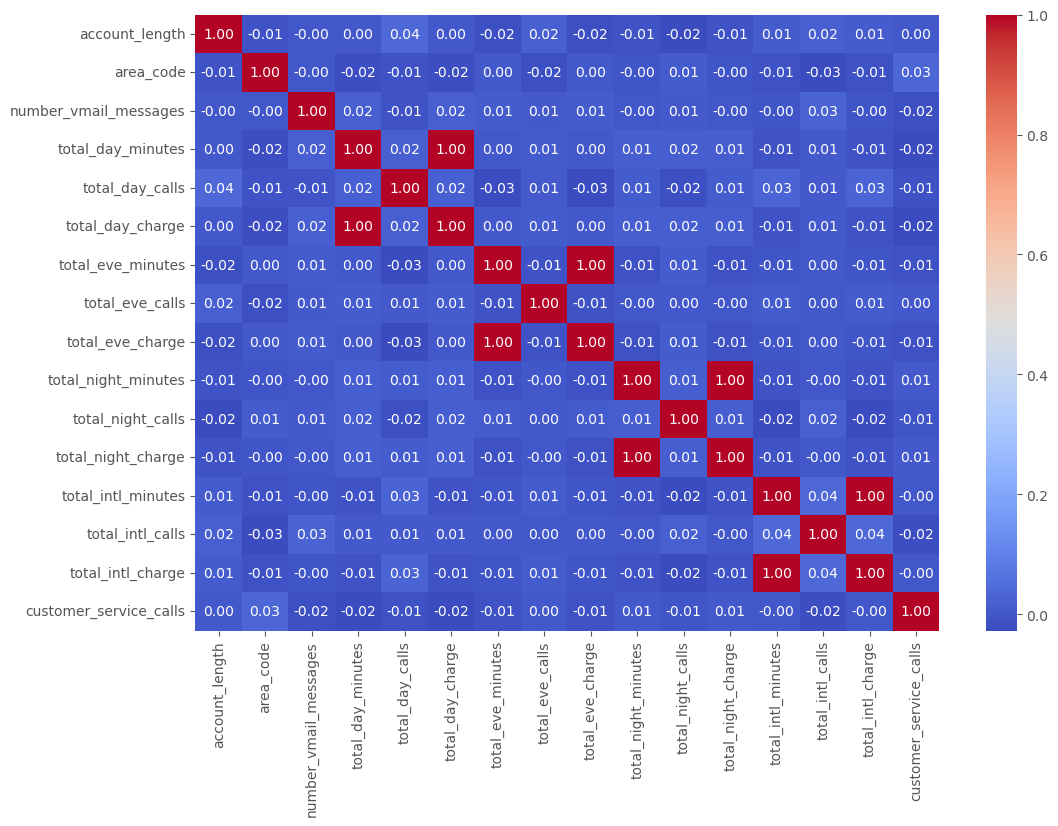

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(heat, cmap='coolwarm', annot=True, fmt='.2f')

plt.show()

#### Redundant Features
Although some of the variables, such as total_day_charge and total_day_minutes, are highly correlated, models like Random Forest and Gradient Boosting, are not negatively impacted by multicollinearity. These models can handle correlated features without performance degradation.  Also, each variable might contain unique information. Removing one of two correlated variables can sometimes lead to a loss of valuable information.  Therefore, we will retain these variables.

There are no significant correlations between any of the feature variables; some small correlations with target variable.


### Key Numeric Features

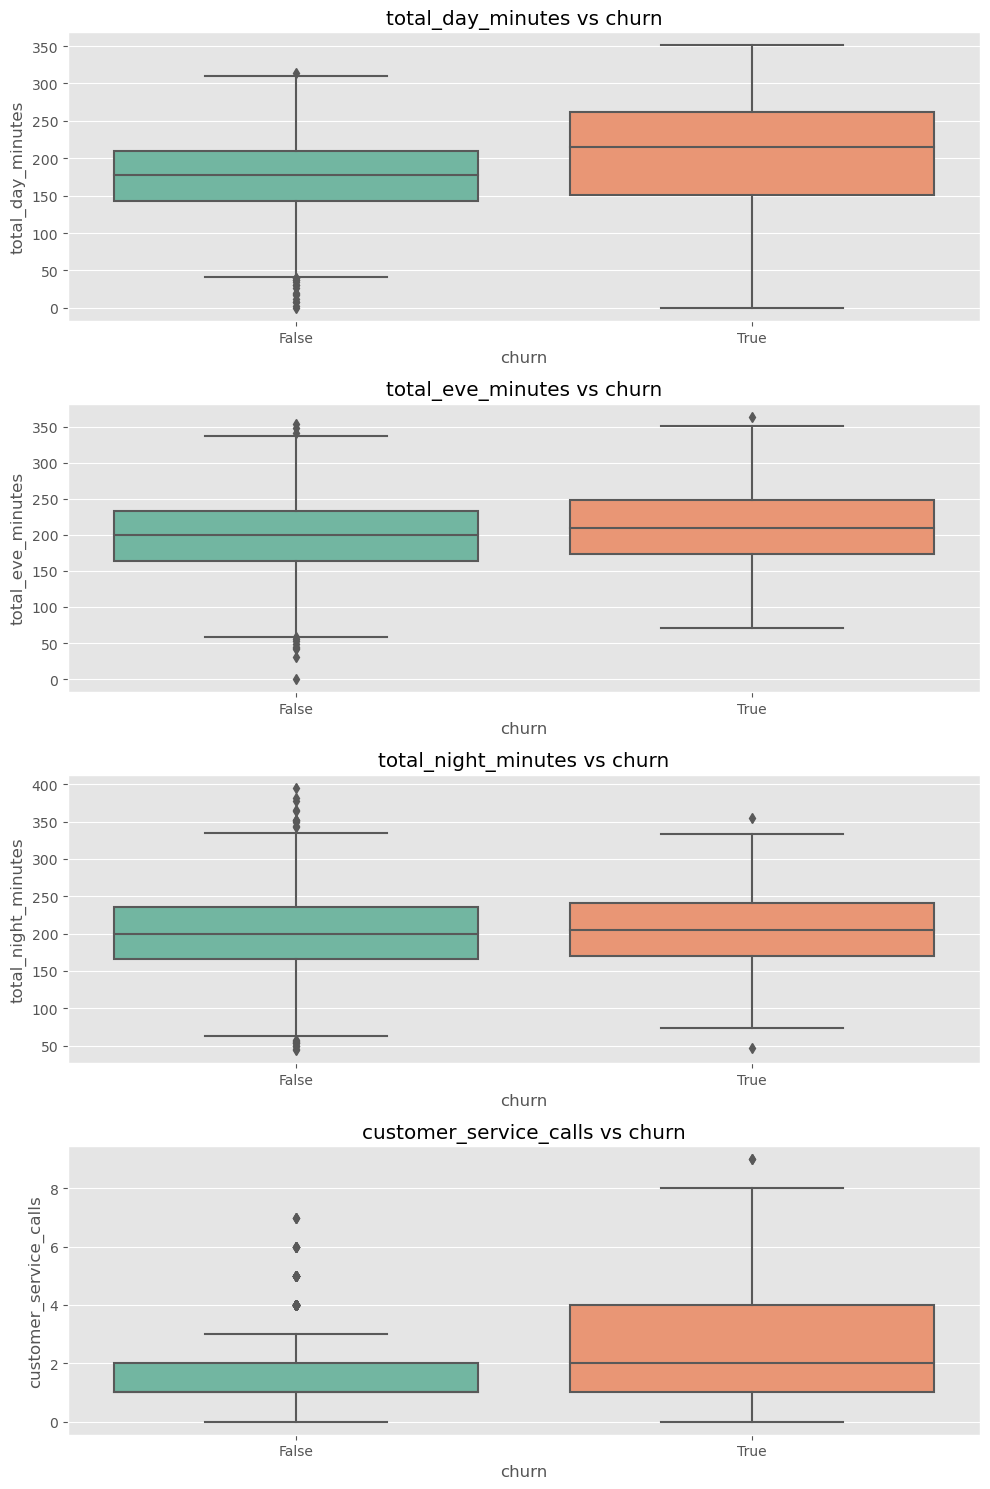

In [18]:
# Bivariate analysis: Numerical vs Categorical (Churn)
num_vars_for_bivariate = ['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'customer_service_calls']

# Creating subplots for the box plots
fig, axes = plt.subplots(nrows=len(num_vars_for_bivariate), ncols=1, figsize=(10, 15), tight_layout=True)

# Creating box plots for each numerical variable against churn
for i, var in enumerate(num_vars_for_bivariate):
    sns.boxplot(x='churn', y=var, data=df_train, ax=axes[i], palette="Set2")
    axes[i].set_title(f'{var} vs churn')

plt.show()


- Total Day Minutes: There is a noticeable difference in the distribution of total day minutes between customers who churned and those who did not. Customers who churned tend to have higher total day minutes.
- Total Eve Minutes: The distributions between churned and non-churned customers for evening minutes are less distinct compared to day minutes, but there still appears to be a slight difference.
- Total Night Minutes: The distributions of total night minutes for churned and non-churned customers are quite similar, suggesting this might be less indicative of churn.
- Customer Service Calls: There is a clear difference in the number of customer service calls between the two groups. Customers who churned tend to have made more customer service calls.

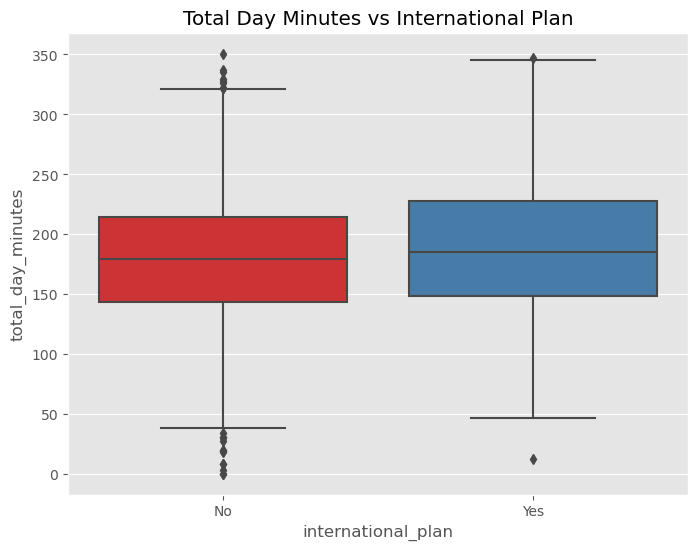

In [19]:
# Bivariate analysis: Categorical vs Numerical (International Plan vs Total Day Minutes)
plt.figure(figsize=(8, 6))
sns.boxplot(x='international_plan', y='total_day_minutes', data=df_train, palette="Set1")
plt.title("Total Day Minutes vs International Plan")
plt.show()



Total Day Minutes vs International Plan:
- The box plot shows the distribution of total_day_minutes for customers with and without an international plan.
- It appears that customers with an international plan tend to have slightly higher day minute usage.

### Key Categorical Features

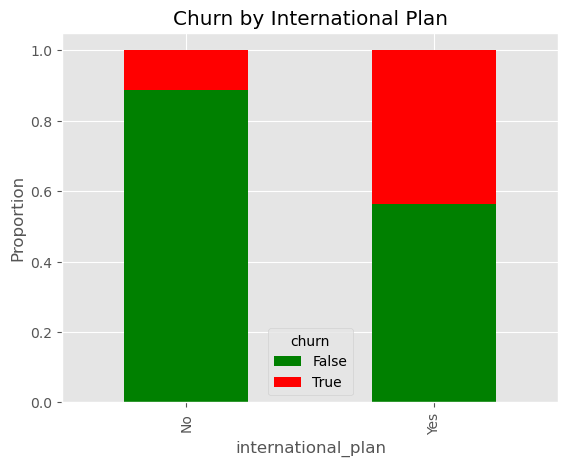

In [20]:
# Bivariate analysis: Categorical vs Categorical (International Plan vs Churn)
# Calculating the proportions for a better comparison
churn_by_international_plan = pd.crosstab(df_train['international_plan'], df_train['churn'], normalize='index')
churn_by_international_plan.plot(kind='bar', stacked=True, color=["green", "red"])
plt.title("Churn by International Plan")
plt.ylabel("Proportion")
plt.show()


Churn by International Plan:
- The stacked bar chart illustrates the proportion of churned and non-churned customers within each category of the international_plan.
- There's a noticeable difference in churn rates between customers with and without an international plan. A higher proportion of customers with an international plan tend to churn.


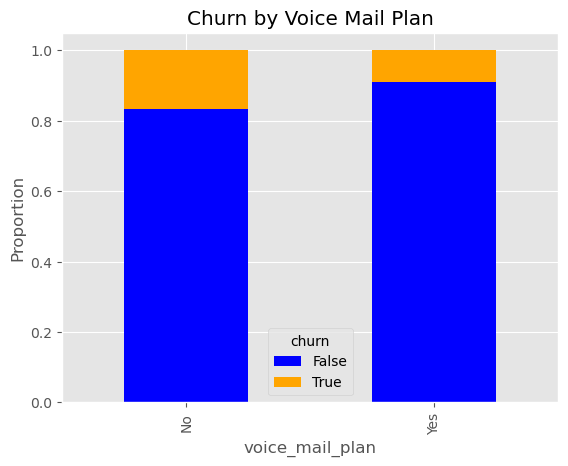

In [21]:
# Bivariate analysis: Categorical vs Categorical (Voice Mail Plan vs Churn)
churn_by_voice_mail_plan = pd.crosstab(df_train['voice_mail_plan'], df_train['churn'], normalize='index')
churn_by_voice_mail_plan.plot(kind='bar', stacked=True, color=["blue", "orange"])
plt.title("Churn by Voice Mail Plan")
plt.ylabel("Proportion")
plt.show()


Churn by Voice Mail Plan:
- The stacked bar chart shows the proportion of churned and non-churned customers relative to whether they have a voice mail plan.
- Interestingly, the proportion of churn appears to be lower among customers with a voice mail plan compared to those without.

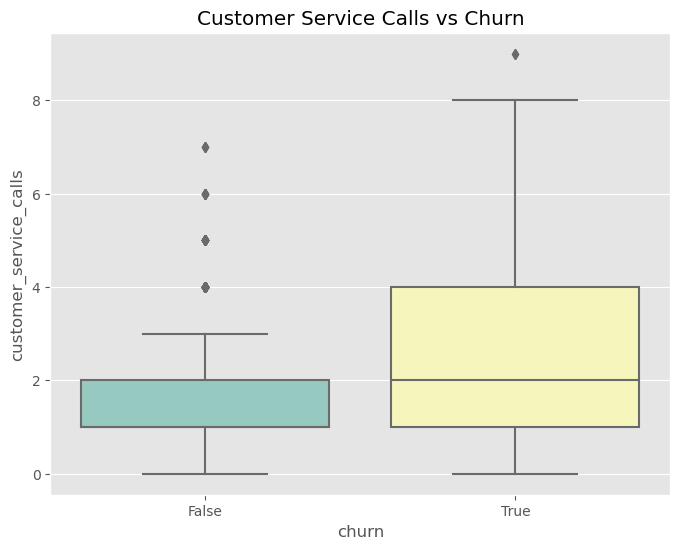

In [22]:
# Bivariate analysis: Numerical vs Categorical (Customer Service Calls vs Churn)
plt.figure(figsize=(8, 6))
sns.boxplot(x='churn', y='customer_service_calls', data=df_train, palette="Set3")
plt.title("Customer Service Calls vs Churn")
plt.show()

Customer Service Calls vs Churn:
- The box plot compares the number of customer service calls made by churned and non-churned customers.
- There's a clear distinction: customers who churned tend to have made more customer service calls. This indicates a strong relationship between the number of customer service calls and churn.

# Modeling

## Preprocessing

In [24]:
# Encode categorical variables
label_encoders = {}
for column in ['state', 'international_plan', 'voice_mail_plan']:
    label_encoders[column] = LabelEncoder()
    df_train[column] = label_encoders[column].fit_transform(df_train[column])
    df_test[column] = label_encoders[column].transform(df_test[column])

# Split the data into features and target
X_train = df_train.drop('churn', axis=1)
y_train = df_train['churn']
X_test = df_test.drop('churn', axis=1)
y_test = df_test['churn']

# Apply Robust Scaling
scaler = RobustScaler()
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test_scaled[numerical_columns] = scaler.transform(X_test[numerical_columns])


Due to the large number of ouliers discovered during EDA, I chose to apply robust scaling when preprocessing the data.  Robust scaling is a technique used to scale features to a similar range by using statistics that are robust to outliers. It's particularly useful in datasets where the presence of outliers is expected or when outliers cannot be removed because they contain valuable information. 

Robust scaling reduces the influence of outliers in the data since it uses the median and the interquartile range (IQR) for scaling. These are less sensitive to outliers than the mean and variance used in standard scaling.  In many real-world scenarios, outliers can contain important information. Robust scaling allows you to retain these data points without letting them dominate the feature scaling.

## Model Selection

I chose to use a Random Forest model as it has many benefits when it comes down to the complexities of predicting customer churn:

- Handling Imbalanced Data: As is the case with our dataset, it is imbalanced since the number of customers who don't churn outweighs those who churn.  Random Forest can handle imbalances well because it involves averaging multiple decision trees to make a final prediction, which can dilute the effect of imbalanced classes.
- Feature Importance: Random Forest can provide insights into which features are most important for predicting churn. This is valuable for understanding the underlying factors driving customer churn and can inform business strategies to improve customer retention.
- Non-Linear Relationships: Random Forest can naturally model non-linear relationships between features without the need for transformation, which is common in customer data.
- Interaction Effects: It can capture interaction effects between features without explicit feature engineering. Customer churn is often influenced by complex interactions between different customer attributes and behaviors.


## Random Forest Model

In [26]:
# Fit initial model

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print({"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1})

{'Accuracy': 0.9475262368815592, 'Precision': 0.9545454545454546, 'Recall': 0.6631578947368421, 'F1 Score': 0.782608695652174}


The initial Random Forest model performed well in terms of accuracy and precision.  However, the recall score is pretty low.  Since recall measures the model's ability to identify all actual positives, a high recall means the model is good at identifying customers who will churn.  In this case, I believe that prioritizing recall is more crucial, since the cost of losing a customer (who could have been retained) can be much higher than the cost of replacing the customer. This approach seeks to minimize missed opportunities for retaining customers at risk of churning, even if it means some false positives.

In [27]:
# Define the weight ratios

# Generate a range of weight ratios for the minority class (churned = True)
weight_ratios = np.linspace(0.1, 12.5, 50)  # Adjust the range and number of ratios as needed

# Create a list of dictionaries for class_weight
class_weight_options = [{0: 1, 1: ratio} for ratio in weight_ratios]


Using weight ratios in a Random Forest model for customer churn is particularly beneficial when dealing with imbalanced datasets, where the number of churned customers is significantly lower than the number of retained customers. 
- Correcting Imbalance: Weight ratios can help correct the class imbalance by assigning a higher weight to the minority class (churned customers). This tells the model that errors in predicting the minority class are more costly than errors in predicting the majority class.
- Improving Recall for the Minority Class: By giving more weight to the minority class, the model will focus more on correctly predicting those cases, potentially increasing the recall. This is important in churn prediction because failing to identify a customer at risk of churn could be more costly than incorrectly identifying a satisfied customer as at risk.

In [28]:
# Set up parameter grid for Randomized Search

param_dist = {
    'n_estimators': np.linspace(100, 1000, 10, dtype=int),  
    'max_depth': np.linspace(10, 100, 10, dtype=int),      
    'min_samples_split': np.linspace(2, 10, 5, dtype=int), 
    'min_samples_leaf': np.linspace(1, 5, 5, dtype=int),      
    'bootstrap': [True, False],       
    'max_features': ['sqrt', 'log2'],
    'class_weight': class_weight_options
}

# Creating a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist, 
    n_iter=50,  
    scoring='recall',  # Focusing on recall
    cv=3,       
    verbose=2, 
    random_state=42,
    n_jobs=-1  # Using all available cores
)

# Performing random search
random_search.fit(X_train_scaled, y_train)


# Best parameters and best recall score
best_params = random_search.best_params_
best_recall = random_search.best_score_
print("Best Parameters:", best_params)
print("Best Recall Score:", best_recall)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 30, 'class_weight': {0: 1, 1: 11.993877551020407}, 'bootstrap': False}
Best Recall Score: 0.7756708407871198


In [29]:
# Train the Random Forest model with the best parameters found
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    return {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1}

# Evaluate the model
metrics = evaluate_model(best_rf_model, X_test_scaled, y_test)
print(metrics)


{'Accuracy': 0.9475262368815592, 'Precision': 0.8125, 'Recall': 0.8210526315789474, 'F1 Score': 0.8167539267015708}


## Gradient Boosting Model

In [30]:
# Initial model

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming X_train_scaled, y_train, X_test_scaled, y_test are already defined from Random Forest preprocessing

# Initial Gradient Boosting Model
gb_initial = GradientBoostingClassifier(random_state=42)
gb_initial.fit(X_train_scaled, y_train)

# Evaluate initial model
initial_predictions = gb_initial.predict(X_test_scaled)
print("Initial Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, initial_predictions)}")
print(f"Precision: {precision_score(y_test, initial_predictions)}")
print(f"Recall: {recall_score(y_test, initial_predictions)}")
print(f"F1 Score: {f1_score(y_test, initial_predictions)}")


Initial Model Performance:
Accuracy: 0.9505247376311844
Precision: 0.9078947368421053
Recall: 0.7263157894736842
F1 Score: 0.8070175438596492


In [31]:
# Parameter grid for Randomized Search
param_dist_gb = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': np.arange(3, 11),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 20),
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],  # Subsampling the training set may help with imbalance
    'max_features': ['sqrt', 'log2', None]
}


# Randomized Search
random_search_gb = RandomizedSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_distributions=param_dist_gb, 
    n_iter=50, 
    scoring='recall', 
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search_gb.fit(X_train_scaled, y_train)
best_params_gb = random_search_gb.best_params_
best_recall_gb = random_search_gb.best_score_

print("Best Parameters:", best_params_gb)
print("Best Recall Score:", best_recall_gb)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'subsample': 0.6, 'n_estimators': 300, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': None, 'max_depth': 4, 'learning_rate': 0.05}
Best Recall Score: 0.7498906777976545


In [32]:
# Train and predict with the best parameters
gb_best = GradientBoostingClassifier(**best_params_gb, random_state=42)
gb_best.fit(X_train_scaled, y_train)
best_predictions = gb_best.predict(X_test_scaled)

# Evaluate best model
print("Best Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, best_predictions)}")
print(f"Precision: {precision_score(y_test, best_predictions)}")
print(f"Recall: {recall_score(y_test, best_predictions)}")
print(f"F1 Score: {f1_score(y_test, best_predictions)}")


Best Model Performance:
Accuracy: 0.9625187406296851
Precision: 0.926829268292683
Recall: 0.8
F1 Score: 0.8587570621468926


## Model Comparison

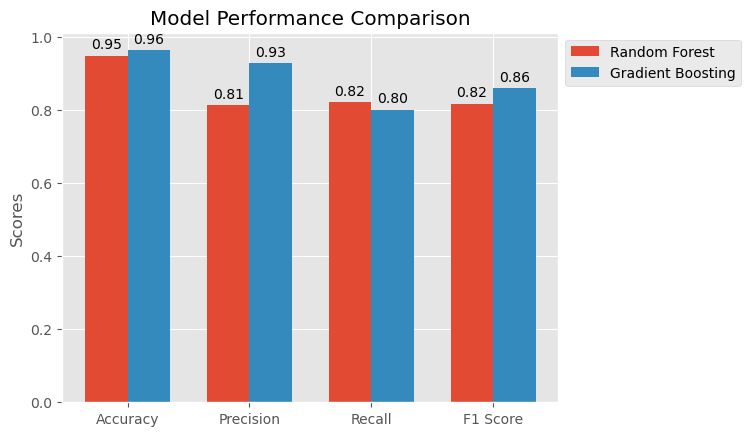

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve, auc

# Assuming that X_test_scaled, y_test are already defined and best_rf_model, gb_best are trained

# Evaluate Random Forest Model
rf_metrics = evaluate_model(best_rf_model, X_test_scaled, y_test)

# Evaluate Gradient Boosting Model
gb_metrics = {
    "Accuracy": accuracy_score(y_test, best_predictions),
    "Precision": precision_score(y_test, best_predictions),
    "Recall": recall_score(y_test, best_predictions),
    "F1 Score": f1_score(y_test, best_predictions)
}

# Data for plotting
labels = list(rf_metrics.keys())
rf_values = list(rf_metrics.values())
gb_values = list(gb_metrics.values())

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# Bar Chart
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rf_values, width, label='Random Forest')
rects2 = ax.bar(x + width/2, gb_values, width, label='Gradient Boosting')

ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


# Add value labels on bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()


These metrics in the above bar chart are crucial for evaluating the performance of classification models, especially in applications like customer churn prediction where both identifying churners (recall) and being correct in the prediction (precision) are important. Here's the analysis of the results:
- Accuracy: Both models exhibit high accuracy, with Gradient Boosting slightly outperforming Random Forest (0.96 vs. 0.95). High accuracy means that both models correctly predict churn and non-churn customers a majority of the time.
- Precision: Gradient Boosting has a precision of 0.93, which is higher than Random Forest's 0.81. This indicates that Gradient Boosting is better at correctly identifying customers who will churn, with fewer false positives (customers who were predicted to churn but did not).
- Recall: Random Forest has a recall of 0.82, which is just slightly higher than Gradient Boosting's 0.80. This suggests that Random Forest is marginally better at identifying all actual churn cases, which is critical in situations where it's important to capture as many churners as possible for interventions.
- F1 Score: The F1 Score, which balances precision and recall, is higher for Gradient Boosting (0.86) compared to Random Forest (0.82). A higher F1 Score indicates that Gradient Boosting has a better overall balance between precision and recall.

In terms of customer churn prediction:
- If the business goal is to identify as many potential churners as possible without being overly concerned about false positives, Random Forest might be the better choice due to its slightly higher recall.
- If the business aims to target churn interventions more precisely and wishes to minimize the costs associated with false positives, then Gradient Boosting is preferable due to its higher precision.
- Given the F1 Score, if the business seeks a balance between identifying churners and minimizing false positives, Gradient Boosting would be the best model overall.
- The slightly higher accuracy of Gradient Boosting also suggests it might be the more robust model overall for this particular dataset.
Ultimately, the choice between the two models should be guided by the specific costs associated with false positives and false negatives and the overall business strategy for customer retention.



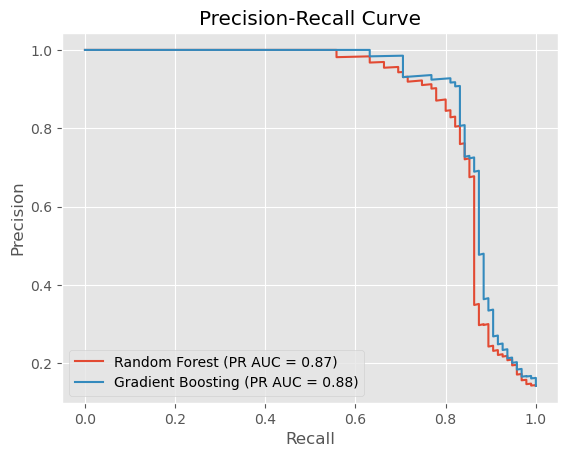

In [34]:
# Precision-Recall AUC Curve for both models
y_score_rf = best_rf_model.predict_proba(X_test_scaled)[:, 1]
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_score_rf)
auc_rf = auc(recall_rf, precision_rf)

y_score_gb = gb_best.predict_proba(X_test_scaled)[:, 1]
precision_gb, recall_gb, _ = precision_recall_curve(y_test, y_score_gb)
auc_gb = auc(recall_gb, precision_gb)

# Plotting Precision-Recall curves
plt.figure()
plt.plot(recall_rf, precision_rf, label=f'Random Forest (PR AUC = {auc_rf:.2f})')
plt.plot(recall_gb, precision_gb, label=f'Gradient Boosting (PR AUC = {auc_gb:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

The above graph is a Precision-Recall Curve that compares the performance of the two models - Random Forest and Gradient Boosting - in predicting customer churn. Here's how to interpret the graph:

- Precision and Recall Trade-off: The Precision-Recall Curve illustrates the trade-off between precision (the proportion of true positives among all predicted positives) and recall (the proportion of true positives among all actual positives).  Ideally, a model would have both high precision and high recall, but typically as recall increases, precision decreases, and vice versa.
- PR AUC (Area Under the Precision-Recall Curve): The area under the curve (AUC) for each model gives a single metric that sums up the model performance across all classification thresholds. A higher AUC represents a better overall performance of a model. In the attached graph, Gradient Boosting has a slightly higher PR AUC (0.88) compared to Random Forest (0.87), indicating that it generally achieves a better balance between precision and recall across different thresholds.

Model Comparison: 
- Random Forest: With a PR AUC of 0.87, the Random Forest model is a strong performer, but the curve shows that for very high recall values, the precision drops significantly. This might indicate that while it can identify most churners, it does so at the expense of incorrectly predicting churn for a number of non-churners.
- Gradient Boosting: The Gradient Boosting model has a PR AUC of 0.88, suggesting it is slightly more effective at distinguishing between churners and non-churners over a range of thresholds. It maintains a better precision for a given recall value, which means it can identify a high proportion of actual churners while keeping the number of false positives lower.

Business Implications:

A business that aims to minimize the cost of false positives (e.g., the cost of unnecessary retention offers) might prefer the Gradient Boosting model due to its higher precision at most recall levels. If the cost of missing out on actual churners (false negatives) is higher (e.g., the lost revenue from churned customers), a model with higher recall might be preferred. In this case, Random Forest and Gradient Boosting are quite close, but Gradient Boosting edges out slightly.

In summary, for customer churn prediction, the choice between Random Forest and Gradient Boosting should be informed by the relative costs of false positives versus false negatives and the desired balance between precision and recall. Gradient Boosting has a slight edge in overall performance according to the PR AUC, but the best choice may vary depending on the specific context and business objectives.

# Feature Importances

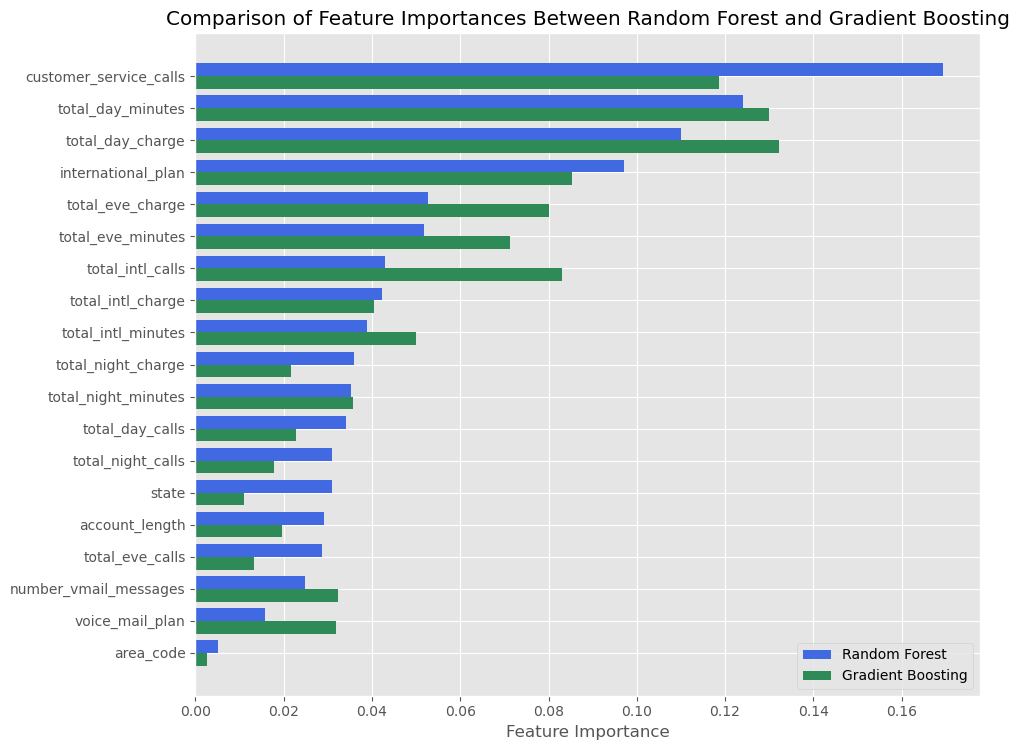

In [44]:
# Get feature importances
rf_importances = best_rf_model.feature_importances_
gb_importances = gb_best.feature_importances_

# Create a DataFrame for feature importances
feature_names = X_train.columns
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Random Forest': rf_importances,
    'Gradient Boosting': gb_importances
})

# Sort by the Random Forest importances for consistent ordering
importances_df.sort_values('Random Forest', ascending=True, inplace=True)

# Plotting the horizontal bar chart with increased vertical size
fig, ax = plt.subplots(figsize=(10, len(feature_names) * 0.4))  # Adjust the multiplier for vertical size

# Get the y-location for each algorithm's set of features
y_locs_rf = np.arange(len(feature_names)) + 0.2  # RF bars above
y_locs_gb = np.arange(len(feature_names)) - 0.2  # GB bars below

# Plot the Random Forest importances
ax.barh(y_locs_rf, importances_df['Random Forest'], height=0.4, label='Random Forest', color='royalblue')

# Plot the Gradient Boosting importances
ax.barh(y_locs_gb, importances_df['Gradient Boosting'], height=0.4, label='Gradient Boosting', color='seagreen')

# Add the feature names on the y-axis
ax.set_yticks(np.arange(len(feature_names)))
ax.set_yticklabels(importances_df['Feature'])

# Add labels and title
ax.set_xlabel('Feature Importance')
ax.set_title('Comparison of Feature Importances Between Random Forest and Gradient Boosting')
ax.legend()

plt.tight_layout()
plt.show()




Recommended Strategies:

Customer Service Calls
Strategy: Improve Customer Support and Follow-Up. High numbers of service calls may indicate customer dissatisfaction or issues with the service. Focus on improving the quality of customer support. Implement follow-up procedures to ensure that problems are fully resolved. Analyzing the reasons behind these calls can provide insights into common issues and areas for improvement.
Proactive Engagement: Use data analytics to identify customers who make frequent service calls and proactively reach out to them with solutions, offers, or assurances.

Total Day Minutes and Total Day Charge
Customized Plans: Since total day minutes and charges are significant, consider offering more personalized or flexible pricing plans that cater to customers' usage patterns. This could include tiered pricing or pay-as-you-go options.
Usage-Based Discounts: Introduce discounts or special offers that reward high usage, encouraging customer loyalty and making high usage financially more attractive.
Transparent Billing: Ensure that billing is transparent and easy to understand. Confusion over charges can be a significant factor in churn. Clear, detailed billing can improve trust and satisfaction.
International Plan

CONSIDER COMPARING RATES PER HOUR FOR EACH PLAN TYPE TO EACH OTHER - SAME WITH WHETHER THEY HAVE AN INTERNATIONAL PLAN

Competitive International Offers: If having an international plan is a strong churn predictor, review your international plan offerings. They may be uncompetitive or unsatisfactory. Offering more attractive international rates or bundled international minutes could retain customers looking to use international services.
Targeted Promotions for Frequent International Users: Use customer usage data to identify customers who would benefit most from an international plan and target them with special offers or promotions.

In all these strategies, data analysis plays a critical role. Understanding the underlying reasons why these features are influential in predicting churn will enable more effective, targeted strategies. Additionally, customer segmentation, personalized communication, and leveraging customer feedback can further refine these strategies.